In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import requests
import io
import numpy as np


## Data  Collection and Procssing

In [5]:

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))



# Inspecting first five rows of dataframe

In [6]:
c.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Splitting the data into Training and Test Data

In [7]:
X=c['Hours'].values.reshape(-1,1)
Y=c['Scores'].values




In [8]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

# model training


In [9]:
# Loading the linear regression model
lin_reg_model=LinearRegression()

In [10]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [11]:
training_data_prediction = lin_reg_model.predict(X_train)

# visualisation

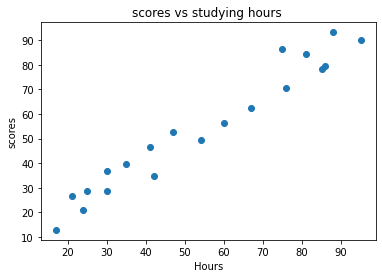

In [12]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Hours")
plt.ylabel("scores")
plt.title("scores vs studying hours ")
plt.show()

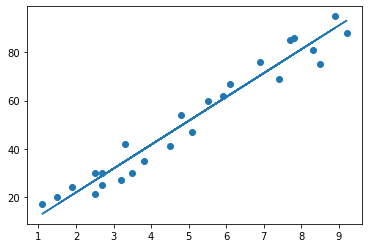

In [13]:
line = lin_reg_model.coef_*X+lin_reg_model.intercept_
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [14]:
Y_pred=lin_reg_model.predict(X_test)

In [15]:
print(Y_test)

[20 27 69 30 62]


In [16]:
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [17]:
tally=pd.DataFrame({'Actual Scores' :Y_test, 'Preedicted scores': Y_pred})
tally

,Actual Scores,Preedicted scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predictions

In [18]:

Hours=[[9.25]]
my_predict=lin_reg_model.predict(Hours)
print("predicted score = " , my_predict[0])

predicted score =  93.69173248737538


# Evaluating the Model

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
print('Mean absolute error is ', mean_absolute_error(Y_test,Y_pred))

Mean absolute error is  4.183859899002975
